In [1]:
2+3

(int) 5


In [2]:
%load AnalyzeReader.C


In [3]:
// A replacement for Analyze.h and Analyze.C that uses TTreeReader
// instead of a TSelector created by MakeSelector.

// To compare using the TTreeReader approach versus the TSelector
// approach, I've implemented Exercise 3 of my ROOT tutorial.

#include "TFile.h"
#include "TH1D.h"
#include "TCanvas.h"
#include "TMath.h"
#include "TTreeReader.h"
#include "TTreeReaderValue.h"

void treeReader() {
  // Open the file containing the tree.
  TFile* myFile = TFile::Open("experiment.root");

  // Create a TTreeReader for the tree "tree1" in file "myFile".
  TTreeReader myReader("tree1", myFile);

  // We have to define TTreeReaderValue<T> for each branch in the
  // tree, where "T" is the type of the object in the branch.

  // Because I'm a lazy bum, I got the following lines by using
  // tree1->MakeSelector("Analyze"), then copied the definitions from
  // Analyze.h. I did a global search-and-replace to change the
  // auto-generated "fReader" to the name of the reader I defined
  // above.

  // Strictly speaking, I only have to define TTreeReaderValues for
  // those n-tuple variables that I actually use. Again, I'm being
  // lazy (though if I omitted the branches I don't need for this
  // particular task, it would run faster).

  TTreeReaderValue<Int_t> event = {myReader, "event"};
  TTreeReaderValue<Float_t> ebeam = {myReader, "ebeam"};
  TTreeReaderValue<Float_t> px = {myReader, "px"};
  TTreeReaderValue<Float_t> py = {myReader, "py"};
  TTreeReaderValue<Float_t> pz = {myReader, "pz"};
  TTreeReaderValue<Float_t> zv = {myReader, "zv"};
  TTreeReaderValue<Float_t> chi2 = {myReader, "chi2"};

  //******** Initialization section *********

  // Create a histogram for the values we read.
  TH1D* ptHist = new TH1D("pt","Histogram of pt",100,0,35);
  ptHist->GetXaxis()->SetTitle("pt [GeV]");
  ptHist->GetYaxis()->SetTitle("number of events");

  // Loop over all entries of the TTree or TChain.
  while (myReader.Next()) {
    //******** Loop section *********
    Double_t pt = TMath::Sqrt((*px)*(*px) + (*py)*(*py));
    ptHist->Fill(pt);
  }

  //******** Wrap-up section *********

  // I only need to explicitly draw the TCanvas if I'm running this in
  // a ROOT C++ notebook.

  TCanvas* ptCanvas = new TCanvas("c1", "pt canvas",800,600);
  ptHist->Draw();
  ptCanvas->Draw();
}


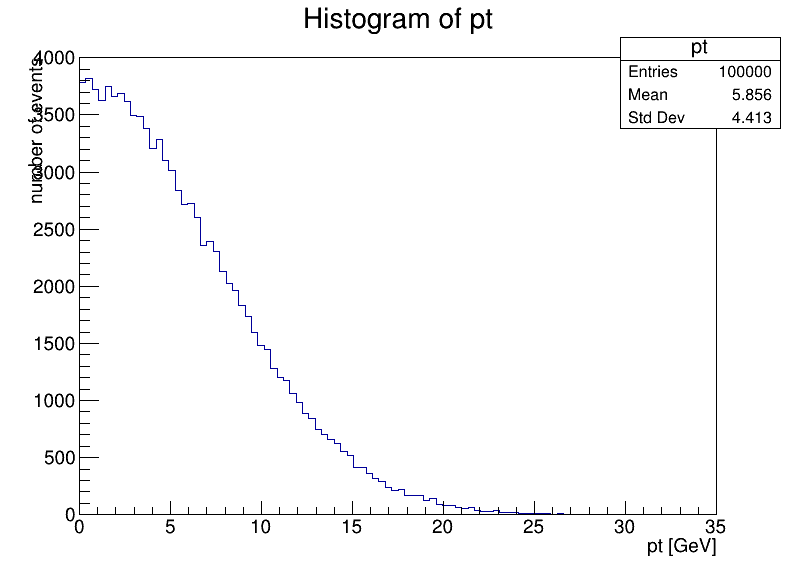

In [4]:
treeReader()